In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt

READ TWO DATASET AS TRAINING AND TESTING SETS

In [2]:
train_data = pd.read_csv("p2_train.csv",names=["f1", "f2","f3","target"])
test_data = pd.read_csv("p2_test.csv",names=["f1", "f2","f3","target"])

ASSIGNING VALUES OF COLUMNS OF DATAFRAME FOR PLOTTING

In [3]:
#Training datasets
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
#Testing datasets
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

COMPARISON OF TARGET DATA

<ipython-input-4-3da0554a0b0c>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


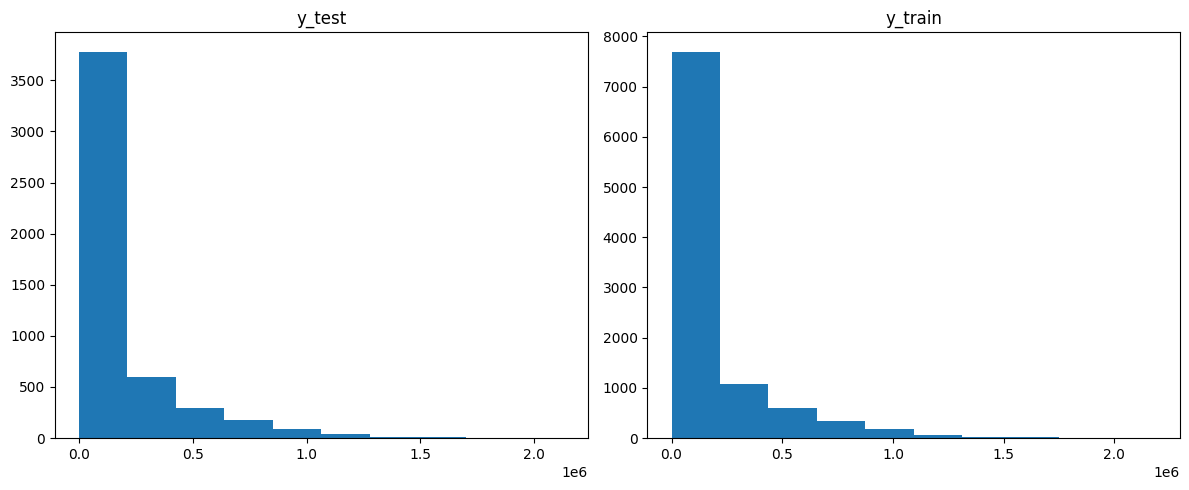

In [4]:
plt.figure(figsize=(12,5))
plt.title("Target Data Distribution")
plt.subplot(1,2,1)
plt.hist(y_test)
plt.title("y_test")
plt.subplot(1,2,2)
plt.hist(y_train)
plt.title("y_train")
plt.tight_layout()
plt.show()

STANDARDIZING THEM TO SUIT WITH ML MODELS

In [5]:
#Using StandardScalar,the Features are Preprocessed
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

EVALUATION OF NON-LINEAR REGRESSION MODELS

In [6]:
def non_linear_models(model):
    mod=model.fit(X_train,y_train)
    y_pred=mod.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    mae= mean_absolute_error(y_test,y_pred)
    return mse,mae

PRINTING OF EVALUATION METRICS

In [7]:
#List of MAE and MSE for plotting graph
MSE=[]
MAE=[]
#Model list
model_list=[SVR(kernel="rbf",C=10),RandomForestRegressor(max_depth=1,random_state=42),MLPRegressor(learning_rate_init=0.001, hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000)]
model_name_list=["Support Vector Regressor","Random Forest Regressor","MLPRegressor"]
print("-------------------------------------Evaluation Metrics----------------------------------------------------------")
for model,model_name in zip(model_list,model_name_list):
    mse,mae=non_linear_models(model)
    MSE.append(mse)
    MAE.append(mae)
    print(f"{model_name}:")
    print("   Mean Squared Error=",round(mse,3))
    print("   Mean Absolute Error=",round(mae,3))
    print("------------------------------------------------------------------------------------------------------------------")

-------------------------------------Evaluation Metrics----------------------------------------------------------
Support Vector Regressor:
   Mean Squared Error= 76814845842.934
   Mean Absolute Error= 148340.207
------------------------------------------------------------------------------------------------------------------
Random Forest Regressor:
   Mean Squared Error= 41046564801.759
   Mean Absolute Error= 134843.076
------------------------------------------------------------------------------------------------------------------
MLPRegressor:
   Mean Squared Error= 1790528744.275
   Mean Absolute Error= 27104.767
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


PLOTTING OF EVALUATION METRICS

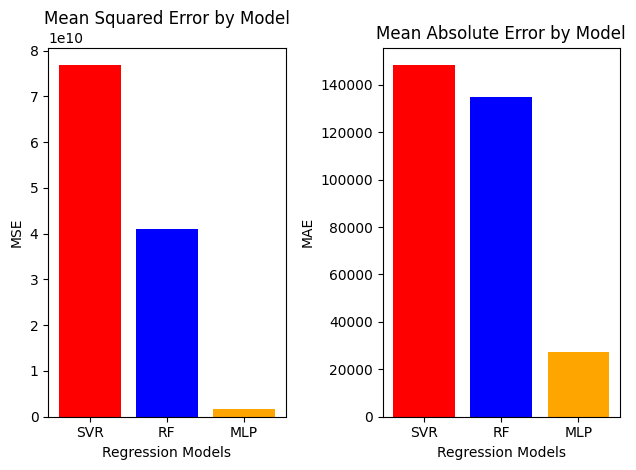

In [8]:
#MSE graph
plt.subplot(1,2,1)
plt.bar(["SVR","RF","MLP"],MSE,color=['red','blue','orange'])
plt.title("Mean Squared Error by Model")
plt.xlabel("Regression Models")
plt.ylabel("MSE")
#MAE graph
plt.subplot(1,2,2)
plt.bar(["SVR","RF","MLP"],MAE,color=['red','blue','orange'])
plt.title("Mean Absolute Error by Model")
plt.xlabel("Regression Models")
plt.ylabel("MAE")
plt.tight_layout()
plt.show()